In [2]:
%pip install -q sklearn
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import warnings
warnings.filterwarnings('ignore')

import tensorflow as tf
import tensorflow.compat.v2.feature_column as fc


Note: you may need to restart the kernel to use updated packages.


In [3]:
dftrain = pd.read_csv('train.csv')
dfeval = pd.read_csv('test.csv')

dftrain.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
dftrain.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
print(f'The shape of the train data set is: {dftrain.shape}')
dftrain.info()
print(f'The shape of the test data set is: {dfeval.shape}')
dfeval.info()


The shape of the train data set is: (891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
The shape of the test data set is: (418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  -

In [6]:
# Dropping passenger ID and cabin because it doesn't tell us anything about the data
# dftrain.drop(['PassengerId'],axis=1,inplace=True) 
# dfeval.drop(['PassengerId'],axis=1,inplace=True)
dftrain.drop(['Ticket'],axis=1,inplace=True)
dfeval.drop(['Ticket'],axis=1,inplace=True)
dftrain.info()
dfeval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name    

# Dealing with unequal numbers
Both age and cabin have far less values that the other features. This could be because of:
- Missing values for our features
- Categorical values
- Alphanumerical values

In [7]:
def missing_percentage(dataframe):
    # This will find the percentage of values missing for each category
    total = dataframe.isnull().sum().sort_values(ascending= False)
    percent = round(dataframe.isnull().sum().sort_values(ascending= False)/len(dataframe)*100,2)
    return pd.concat([total, percent], axis=1, keys = ['Total','Percent'])

print(missing_percentage(dftrain))

             Total  Percent
Cabin          687    77.10
Age            177    19.87
Embarked         2     0.22
PassengerId      0     0.00
Survived         0     0.00
Pclass           0     0.00
Name             0     0.00
Sex              0     0.00
SibSp            0     0.00
Parch            0     0.00
Fare             0     0.00


In [8]:
print(missing_percentage(dfeval))

             Total  Percent
Cabin          327    78.23
Age             86    20.57
Fare             1     0.24
PassengerId      0     0.00
Pclass           0     0.00
Name             0     0.00
Sex              0     0.00
SibSp            0     0.00
Parch            0     0.00
Embarked         0     0.00


In [9]:
dftrain[dftrain.Embarked.isnull()] # to find the exact values of the 2 Nan values for embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,B28,NaN


Text(0.5, 1.0, 'Test Set')

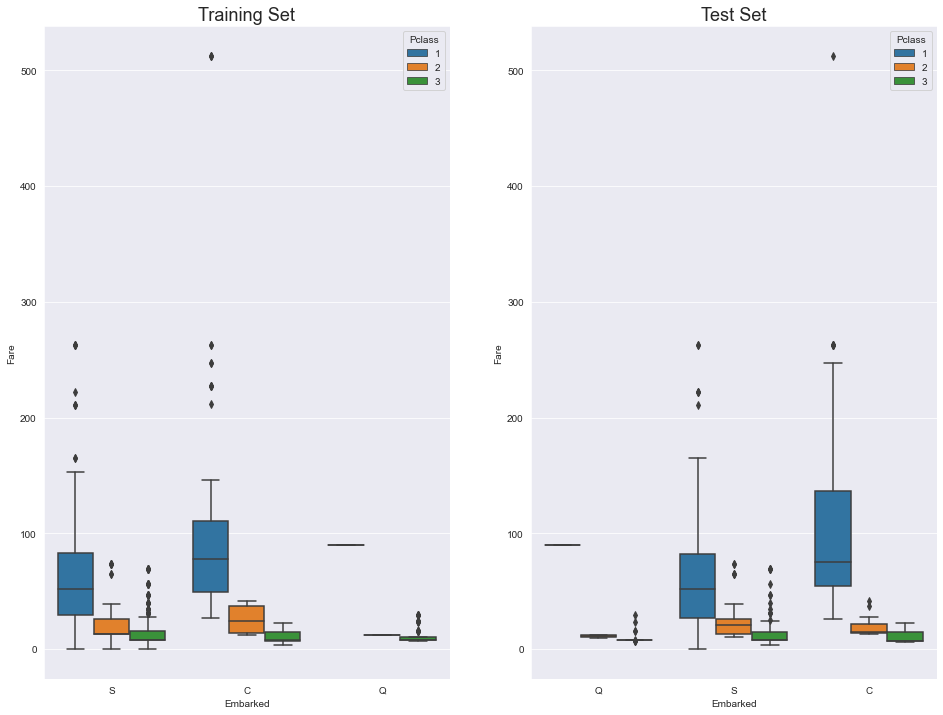

In [10]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=dftrain, ax = ax[0]);
ax2 = sns.boxplot(x="Embarked", y="Fare", hue="Pclass", data=dfeval, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

Since the two Nan values paid $80 for their ticket and were in Pclass 1, from the graph, we can determine that 
similar passengers embarked in C, so therefore we can assume they also embarked in C and can fill in those values.

In [11]:
dftrain.Embarked.fillna('C', inplace=True)
print(missing_percentage(dftrain))

             Total  Percent
Cabin          687    77.10
Age            177    19.87
PassengerId      0     0.00
Survived         0     0.00
Pclass           0     0.00
Name             0     0.00
Sex              0     0.00
SibSp            0     0.00
Parch            0     0.00
Fare             0     0.00
Embarked         0     0.00


In [12]:
dftrain[dftrain.Cabin.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,NaN,S


In [13]:
print("Train Cabin missing: " + str(dftrain.Cabin.isnull().sum()/len(dftrain.Cabin)))
print("Test Cabin missing: " + str(dfeval.Cabin.isnull().sum()/len(dfeval.Cabin)))

Train Cabin missing: 0.7710437710437711
Test Cabin missing: 0.7822966507177034


77% missing in the train dataset and 78 percent missing in the test data set. We can use the other fare values to 
draw conclusions about the cabin based on Fare. 

In [14]:
## Concat train and test into a variable "all_data"
survivers = dftrain.Survived

dftrain.drop(["Survived"],axis=1, inplace=True)

all_data = pd.concat([dftrain,dfeval], ignore_index=False)

## Assign all the null values to N
all_data.Cabin.fillna("N", inplace=True)

In [15]:
all_data.Cabin = [i[0] for i in all_data.Cabin]
all_data.groupby('Cabin')['Fare'].mean().sort_values()

Cabin
G     14.205000
F     18.079367
N     19.132707
T     35.500000
A     41.244314
D     53.007339
E     54.564634
C    107.926598
B    122.383078
Name: Fare, dtype: float64

In [16]:
def cabin_estimator(value):
    cab = 0
    if value < 16:
        cab = 'G'
    elif value >= 16 and value < 27:
        cab = 'F'
    elif value >= 27 and value < 38:
        cab = 'T'
    elif value >= 38 and value < 47:
        cab = 'A'
    elif value >=47 and value < 54:
        cab = 'D'
    elif value >= 54 and value < 80:
        cab = 'E'
    elif value >= 80 and value < 114:
        cab = 'C'
    else:
        cab = 'B'
    return cab 

In [17]:
with_N = all_data[all_data.Cabin == 'T']
without_N = all_data[all_data.Cabin != 'T']

# applying estimator using lambda to apply all at once
with_N['Cabin'] = with_N.Fare.apply(lambda x: cabin_estimator(x))

## getting back train. 
all_data = pd.concat([with_N, without_N], axis=0)

## PassengerId helps us separate train and test. 
all_data.sort_values(by = 'PassengerId', inplace=True)

## Separating train and test from all_data. 
dftrain = all_data[:891]

dfeval = all_data[891:]

# adding saved target variable with train. 
dftrain['Survived'] = survivers

In [18]:
dftrain.head() # To check that df was back to normal

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,N,S,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,1
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,N,S,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C,S,1
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,N,S,0


In [19]:
dfeval[dfeval.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,NaN,N,S


In [20]:
missing_value = dfeval[(dfeval.Pclass == 3) & 
                     (dfeval.Embarked == "S") & 
                     (dfeval.Sex == "male")].Fare.mean()
## replace the dfeval.fare null values with dfeval.fare mean
dfeval.Fare.fillna(missing_value, inplace=True)

Age can't be assumed so easily, so we will use ML technique later to predict the age based on other features

Assumptions of Correlation:
- Women survived more than men
- 1st class passengers survived more
- Younger people survived more

Time to test!

Text(0.5, 1.0, 'Surival rate vs. Gender of Passengers')

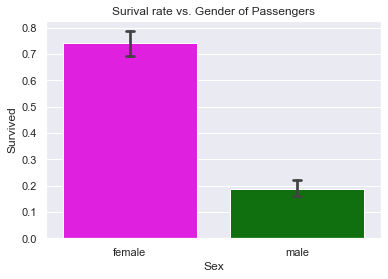

In [21]:
pal = {'male': 'green', 'female': 'magenta'}
sns.set_theme(style = 'darkgrid')
sns.barplot(x = 'Sex', y = 'Survived', data=dftrain, palette=pal,order=['female','male'],capsize = 0.05)

plt.title('Surival rate vs. Gender of Passengers')

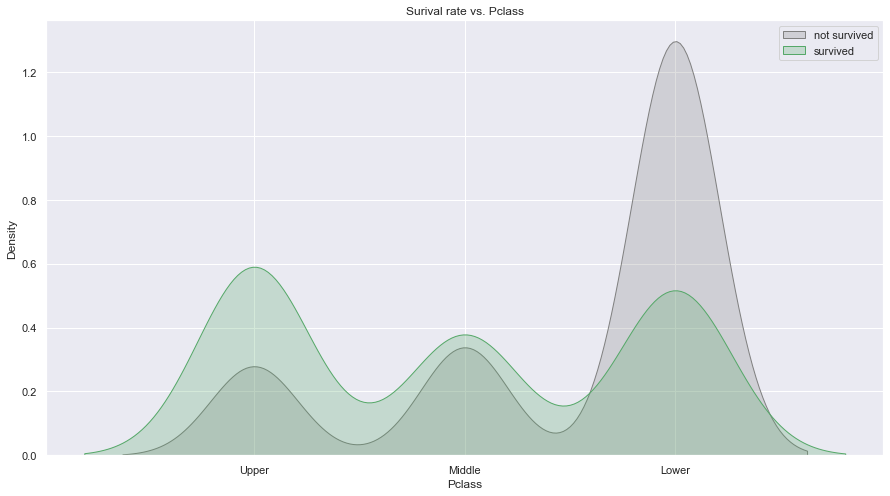

In [22]:
fig = plt.figure(figsize=(15,8),)
pal = {1: 'gold', 2: 'black', 3:'grey'}
sns.set_theme(style = 'darkgrid')
sns.kdeplot(dftrain.loc[(dftrain['Survived'] == 0),'Pclass'] , color='gray',shade=True,label='not survived')
sns.kdeplot(dftrain.loc[(dftrain['Survived'] == 1),'Pclass'] , color='g',shade=True, label='survived')
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(dftrain.Pclass.unique()), labels);
plt.title('Surival rate vs. Pclass')
plt.legend()

PClass represents socio-economic class, therefore higher class citzens survived more often.

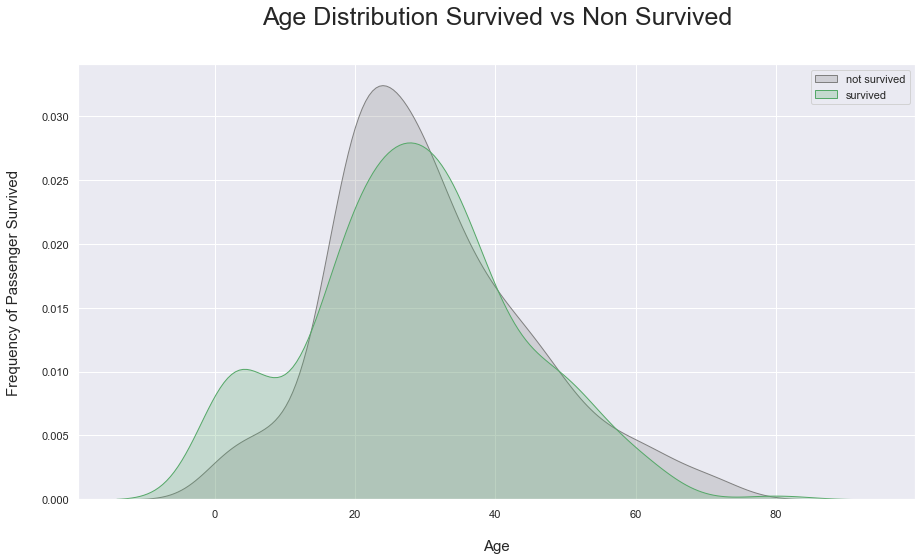

In [23]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(dftrain.loc[(dftrain['Survived'] == 0),'Age'] , color='gray',shade=True,label='not survived')
ax=sns.kdeplot(dftrain.loc[(dftrain['Survived'] == 1),'Age'] , color='g',shade=True, label='survived')
plt.title('Age Distribution Survived vs Non Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Age", fontsize = 15, labelpad = 20)
plt.legend();



In [24]:
dftrain.describe()


,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [25]:
survived_summary = dftrain.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
0,female,431.028662,2.159236,27.915709,0.694268,0.649682,44.479818,0.742038
1,male,454.147314,2.389948,30.726645,0.429809,0.235702,25.523893,0.188908


In [26]:
survived_summary = dftrain.groupby('Pclass')
survived_summary.mean().reset_index()

,Pclass,PassengerId,Age,SibSp,Parch,Fare,Survived
0,1,461.597222,38.233441,0.416667,0.356481,84.154687,0.629630
1,2,445.956522,29.877630,0.402174,0.380435,20.662183,0.472826
2,3,439.154786,25.140620,0.615071,0.393075,13.675550,0.242363


# Some insights
- only 38% of people survived
- 74% of women survived and only 19% of men survived



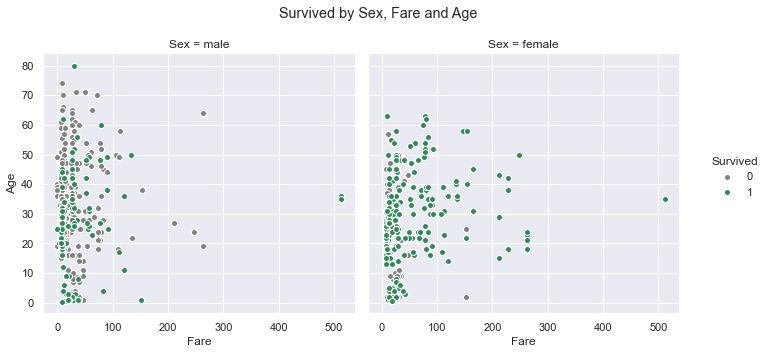

In [27]:
pal = {1:"seagreen", 0:"gray"}
g = sns.FacetGrid(dftrain, size=5,hue="Survived", col ="Sex", margin_titles=True,
                palette=pal,)
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age")
plt.subplots_adjust(top=0.85)

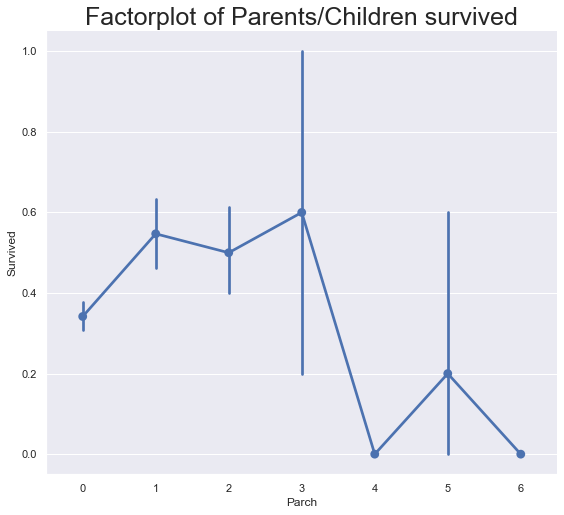

In [28]:
dftrain = dftrain[dftrain.Fare < 500] # There are only 3 values above 500 that are outliers so we can assume they can be neglected

sns.catplot(x = 'Parch', y = 'Survived', data = dftrain, kind = 'point', height=8)
plt.title('Factorplot of Parents/Children survived', fontsize = 25)
plt.subplots_adjust(top=0.85)

Passengers traveling in a large group with family have a diminishing survival with groups larger than 3.

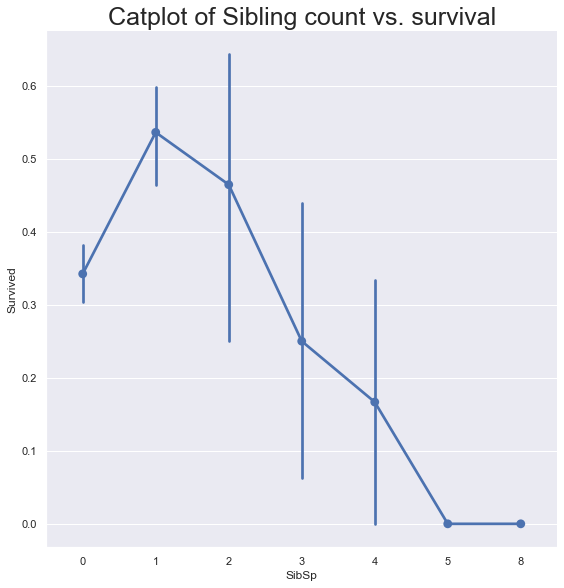

In [29]:
sns.catplot(x = 'SibSp', y = 'Survived', data = dftrain, kind = 'point', height = 8)
plt.title('Catplot of Sibling count vs. survival', fontsize = 25)
plt.subplots_adjust()

People traveling with more siblings have a far lower chance of surviving.

In [30]:
# Placing 0 for female and 
# 1 for male in the "Sex" column. 
dftrain['Sex'] = dftrain.Sex.apply(lambda x: 0 if x == "female" else 1)
dfeval['Sex'] = dfeval.Sex.apply(lambda x: 0 if x == "female" else 1)

In [31]:
pd.DataFrame(abs(dftrain.corr()['Survived']).sort_values(ascending=False))

,Survived
Survived,1.000000
Sex,0.545899
Pclass,0.334068
Fare,0.261742
Parch,0.082157
Age,0.079472
SibSp,0.033395
PassengerId,0.006916


In [32]:
corr = dftrain.corr()**2
corr.Survived.sort_values(ascending=False)

Survived       1.000000
Sex            0.298006
Pclass         0.111601
Fare           0.068509
Parch          0.006750
Age            0.006316
SibSp          0.001115
PassengerId    0.000048
Name: Survived, dtype: float64

Text(0.5, 1.03, 'Correlations Among Features')

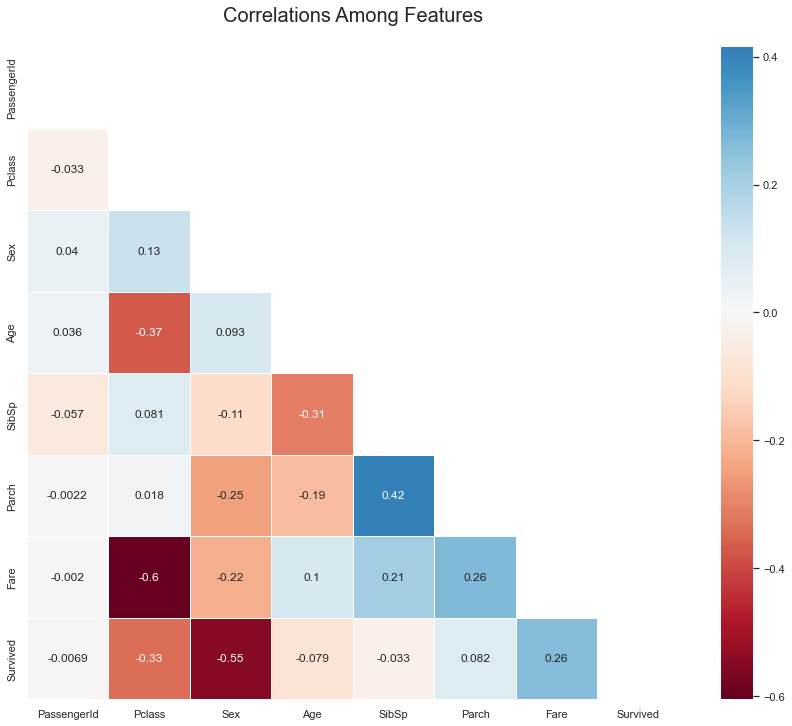

In [33]:
mask = np.zeros_like(dftrain.corr(), dtype= bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('whitegrid')
plt.subplots(figsize = (15,12))
sns.heatmap(dftrain.corr(), annot = True, mask= mask, cmap = 'RdBu', linewidth = 0.9, linecolor  ='white', fmt = '.2g', center = 0, square = True)
plt.title('Correlations Among Features', y = 1.03, fontsize = 20)

Positive Correlation:
- Fare and Survived = 0.26

Negative Correlation:
- Fare and Pclass: -0.6
- Survived and sex: -0.55
- Pclass and survived: -0.33

## Statistical Analysis
- Null hypothesis: Males survive more often than females 
- Alternative hypothesis: Females survive more than males

In [34]:
male_mean = dftrain[dftrain["Sex"] == 1].Survived.mean()

female_mean = dftrain[dftrain["Sex"] == 0].Survived.mean()

print(f'The percent of males that survived is {male_mean*100:.2f}%')
print(f'The percent of females that survived is {female_mean*100:.2f}%')
print(f'The difference between male and female survival rate is {(female_mean-male_mean)*100:2f}%')

The percent of males that survived is 18.61%
The percent of females that survived is 74.12%
The difference between male and female survival rate is 55.512710%


In [35]:
# separating male and female dataframe. 
import random
male = dftrain[dftrain['Sex'] == 1]
female = dftrain[dftrain['Sex'] == 0]

# empty list for storing mean sample
m_mean_samples = []
f_mean_samples = []

for i in range(50):
    m_mean_samples.append(np.mean(random.sample(list(male['Survived']),50,)))
    f_mean_samples.append(np.mean(random.sample(list(female['Survived']),50,)))
    

# Print them out
print (f"Male mean sample mean: {round(np.mean(m_mean_samples),2)}")
print (f"Male mean sample mean: {round(np.mean(f_mean_samples),2)}")
print (f"Difference between male and female mean sample mean: {round(np.mean(f_mean_samples) - np.mean(m_mean_samples),2)}")

Male mean sample mean: 0.19
Male mean sample mean: 0.74
Difference between male and female mean sample mean: 0.55


In [36]:
print(stats.ttest_ind(dftrain[dftrain['Sex']==1].Survived, dftrain[dftrain['Sex']==0].Survived))


Ttest_indResult(statistic=-19.39378865770895, pvalue=4.1261172329209455e-70)


Since the p-value is much smaller than 0.05, it means that we reject the null hypothesis and therefore females survive more often on average

## Feature engineering

In [37]:
# Family size to combine parch and siblings
dftrain['family_size'] = dftrain.SibSp + dftrain.Parch+1
dfeval['family_size'] = dfeval.SibSp + dfeval.Parch+1

In [38]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

dftrain['family_group'] = dftrain['family_size'].map(family_group)
dfeval['family_group']= dfeval['family_size'].map(family_group)

In [39]:
dftrain['is_alone'] = [1 if i<2 else 0 for i in dftrain.family_size]
dfeval['is_alone'] = [1 if i<2 else 0 for i in dfeval.family_size]

In [40]:
## Calculating fare based on family size. 
dftrain['calculated_fare'] = dftrain.Fare/dftrain.family_size
dfeval['calculated_fare'] = dfeval.Fare/dfeval.family_size

In [41]:
def fare_group(fare):
    """
    This function creates a fare group based on the fare provided
    """
    
    a= ''
    if fare <= 4:
        a = 'Very_low'
    elif fare <= 10:
        a = 'low'
    elif fare <= 20:
        a = 'mid'
    elif fare <= 45:
        a = 'high'
    else:
        a = "very_high"
    return a

dftrain['fare_group'] = dftrain['calculated_fare'].map(fare_group)
dfeval['fare_group'] = dfeval['calculated_fare'].map(fare_group)

In [42]:
dftrain.drop(['PassengerId'], axis =1, inplace= True)
dfeval.drop(['PassengerId'], axis =1, inplace= True)

In [43]:
dftrain.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Survived,family_size,family_group,is_alone,calculated_fare,fare_group
0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,N,S,0,2,small,0,3.62500,Very_low
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,C,1,2,small,0,35.64165,high
2,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,N,S,1,1,loner,1,7.92500,low
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,C,S,1,2,small,0,26.55000,high
4,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,N,S,0,1,loner,1,8.05000,low


In [44]:
dftrain = pd.get_dummies(dftrain, columns=["Pclass", 'Cabin','Embarked', 'family_group', 'fare_group'], drop_first=False)
dfeval = pd.get_dummies(dfeval, columns=["Pclass",'Cabin','Embarked','family_group', 'fare_group'], drop_first=False)
dftrain.drop(['family_size','Name', 'Fare'], axis=1, inplace=True)
dfeval.drop(['Name','family_size',"Fare"], axis=1, inplace=True)

In [45]:
dftrain.head()

,Sex,Age,SibSp,Parch,Survived,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,...,Embarked_Q,Embarked_S,family_group_large,family_group_loner,family_group_small,fare_group_Very_low,fare_group_high,fare_group_low,fare_group_mid,fare_group_very_high
0,1,22.0,1,0,0,0,3.62500,0,0,1,...,0,1,0,0,1,1,0,0,0,0
1,0,38.0,1,0,1,0,35.64165,1,0,0,...,0,0,0,0,1,0,1,0,0,0
2,0,26.0,0,0,1,1,7.92500,0,0,1,...,0,1,0,1,0,0,0,1,0,0
3,0,35.0,1,0,1,0,26.55000,1,0,0,...,0,1,0,0,1,0,1,0,0,0
4,1,35.0,0,0,0,1,8.05000,0,0,1,...,0,1,0,1,0,0,0,1,0,0


In [46]:
## rearranging the columns so that I can easily use the dataframe to predict the missing age values. 
dftrain = pd.concat([dftrain[["Survived", "Age", "Sex","SibSp","Parch"]], dftrain.loc[:,"is_alone":]], axis=1)
dfeval = pd.concat([dfeval[["Age", "Sex"]], dfeval.loc[:,"SibSp":]], axis=1)

In [47]:
## Importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

## writing a function that takes a dataframe with missing values and outputs it by filling the missing values. 
def completing_age(df):
    ## gettting all the features except survived
    age_df = df.loc[:,"Age":] 
    
    temp_train = age_df.loc[age_df.Age.notnull()] ## df with age values
    temp_test = age_df.loc[age_df.Age.isnull()] ## df without age values
    
    y = temp_train.Age.values ## setting target variables(age) in y 
    x = temp_train.loc[:, "Sex":].values
    
    rfr = RandomForestRegressor(n_estimators=1500, n_jobs=-1)
    rfr.fit(x, y)
    
    predicted_age = rfr.predict(temp_test.loc[:, "Sex":])
    
    df.loc[df.Age.isnull(), "Age"] = predicted_age
    

    return df

## Implementing the completing_age function in both train and test dataset. 
completing_age(dftrain)
completing_age(dfeval);

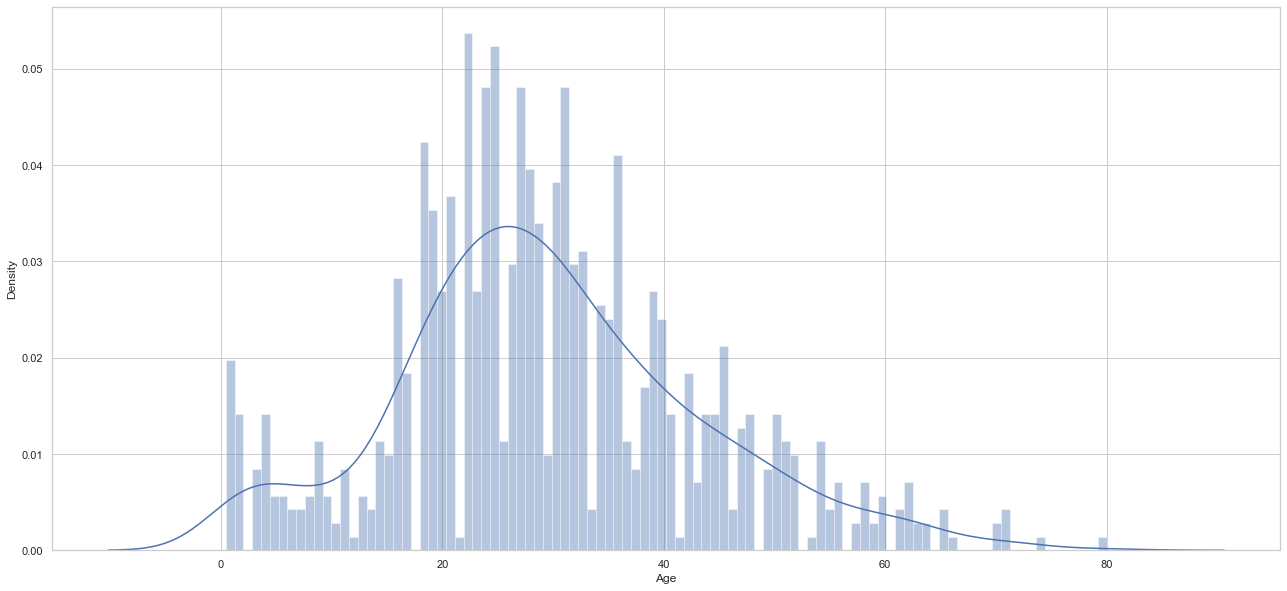

In [48]:
## Let's look at the his
plt.subplots(figsize = (22,10),)
sns.distplot(dftrain.Age, bins = 100, kde = True, rug = False, norm_hist=False);

In [49]:
## create bins for age
def age_group_fun(age):
    """
    This function creates a bin for age
    """
    a = ''
    if age <= 1:
        a = 'infant'
    elif age <= 4: 
        a = 'toddler'
    elif age <= 13:
        a = 'child'
    elif age <= 18:
        a = 'teenager'
    elif age <= 35:
        a = 'Young_Adult'
    elif age <= 45:
        a = 'adult'
    elif age <= 55:
        a = 'middle_aged'
    elif age <= 65:
        a = 'senior_citizen'
    else:
        a = 'old'
    return a
        
## Applying "age_group_fun" function to the "Age" column.
dftrain['age_group'] = dftrain['Age'].map(age_group_fun)
dfeval['age_group'] = dfeval['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
dftrain = pd.get_dummies(dftrain,columns=['age_group'], drop_first=True)
dfeval = pd.get_dummies(dfeval,columns=['age_group'], drop_first=True);

## Pre-modeling tasks

In [50]:
X = dftrain.drop(['Survived'], axis = 1)
y = dftrain['Survived']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size = 0.33, random_state=0)

## Feature Scaling

In [52]:
dftrain.sample(5)

,Survived,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
43,1,3.000000,0,1,2,0,10.3948,0,1,0,...,1,0,0,0,0,0,0,0,0,1
420,0,32.118948,1,0,0,1,7.8958,0,0,1,...,0,0,0,0,0,0,0,0,0,0
886,0,27.000000,1,0,0,1,13.0000,0,1,0,...,1,0,0,0,0,0,0,0,0,0
330,1,23.506297,0,2,0,0,7.7500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
674,0,36.121612,1,0,0,1,0.0000,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [53]:
headers = X_train.columns
X_train.head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
170,61.000000,1,0,0,1,33.5000,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
187,45.000000,1,0,0,1,26.5500,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
849,41.539225,0,1,0,0,44.5521,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
433,17.000000,1,0,0,1,7.1250,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
651,18.000000,0,0,1,0,11.5000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0


Age and fare are very variable and need to be scaled so that the model does not unintentionally hold extra weight for those values

In [54]:
from sklearn.preprocessing import StandardScaler
st_scale = StandardScaler()

X_train = st_scale.fit_transform(X_train) # use the standard scalar to set mean to 0 with variance 1 for X_train

X_test = st_scale.transform(X_test) # do the same for X_test

In [55]:
pd.DataFrame(X_train, columns=headers).head()

,Age,Sex,SibSp,Parch,is_alone,calculated_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,...,fare_group_mid,fare_group_very_high,age_group_adult,age_group_child,age_group_infant,age_group_middle_aged,age_group_old,age_group_senior_citizen,age_group_teenager,age_group_toddler
0,2.298326,0.725942,-0.464750,-0.463616,0.794901,0.554725,1.775907,-0.516260,-1.102913,-0.149583,...,-0.455321,-0.30317,-0.463383,-0.242536,-0.116841,-0.279356,-0.101015,5.099020,-0.303170,-0.19144
1,1.140834,0.725942,-0.464750,-0.463616,0.794901,0.292298,1.775907,-0.516260,-1.102913,-0.149583,...,-0.455321,-0.30317,2.158041,-0.242536,-0.116841,-0.279356,-0.101015,-0.196116,-0.303170,-0.19144
2,0.890470,-1.377520,0.356862,-0.463616,-1.258018,0.972044,1.775907,-0.516260,-1.102913,-0.149583,...,-0.455321,-0.30317,2.158041,-0.242536,-0.116841,-0.279356,-0.101015,-0.196116,-0.303170,-0.19144
3,-0.884778,0.725942,-0.464750,-0.463616,0.794901,-0.441176,-0.563093,-0.516260,0.906690,-0.149583,...,-0.455321,-0.30317,-0.463383,-0.242536,-0.116841,-0.279356,-0.101015,-0.196116,3.298485,-0.19144
4,-0.812435,-1.377520,-0.464750,0.703282,-1.258018,-0.275979,-0.563093,1.937008,-1.102913,-0.149583,...,2.196253,-0.30317,-0.463383,-0.242536,-0.116841,-0.279356,-0.101015,-0.196116,3.298485,-0.19144


## Modeling the data

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, accuracy_score

logreg = LogisticRegression(solver='liblinear', penalty = 'l1', random_state = 42)

logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)


In [57]:
score = logreg.score(X_test, y_test)
print(score)

0.8027210884353742


In [58]:
from sklearn.metrics import classification_report, confusion_matrix
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,151,26
Survived,32,85


Text(0.5, 1.0, 'Accuracy Score: 0.8027210884353742')

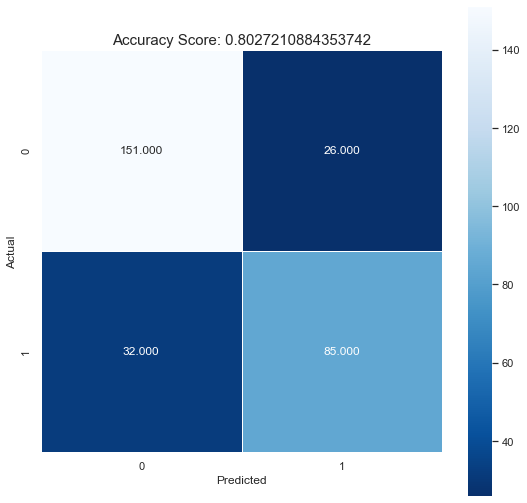

In [59]:
from sklearn import metrics
predictions = logreg.predict(X_test)
cm = metrics.confusion_matrix(y_test, predictions)

plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt='0.3f', linewidth = 0.5, square= True, cmap='Blues_r')
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_samples_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_samples_title, size =15)

In [60]:
from sklearn.metrics import classification_report, balanced_accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       177
           1       0.77      0.73      0.75       117

    accuracy                           0.80       294
   macro avg       0.80      0.79      0.79       294
weighted avg       0.80      0.80      0.80       294



## AUC and ROC Curve

0.8430875464773769


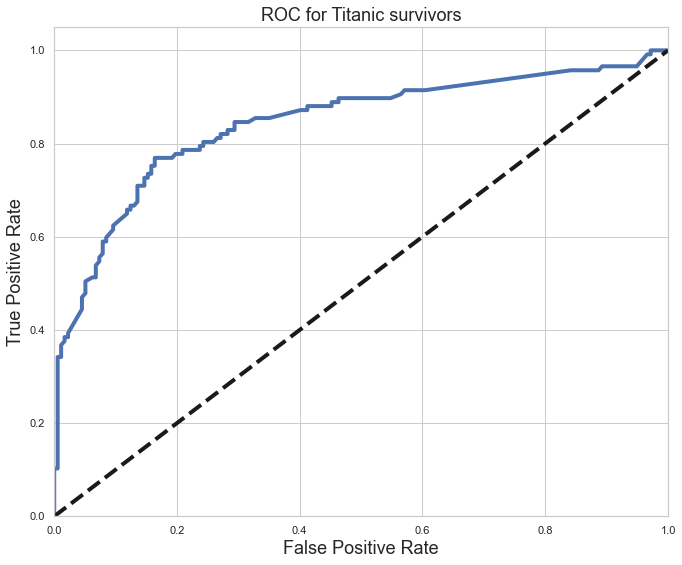

In [61]:
from sklearn.metrics import roc_curve, auc 

y_score = logreg.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print(ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()


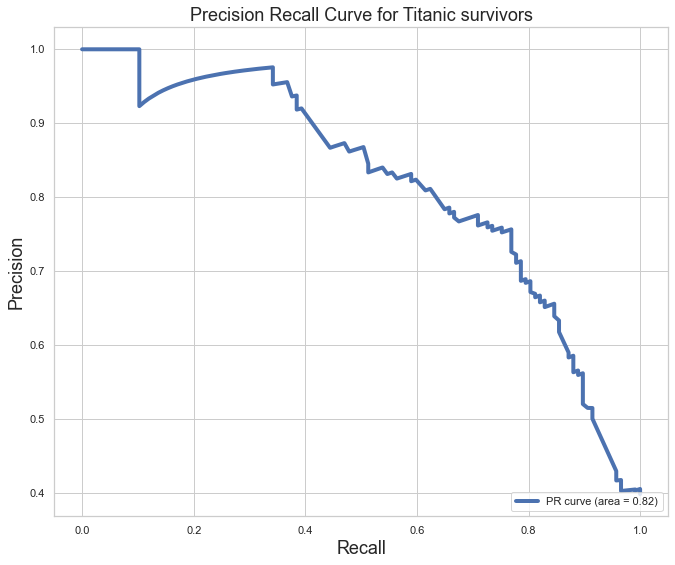

In [62]:
from sklearn.metrics import precision_recall_curve

y_score = logreg.decision_function(X_test)

precision, recall, _ = precision_recall_curve(y_test, y_score)
PR_AUC = auc(recall, precision)

plt.figure(figsize=[11,9])
plt.plot(recall, precision, label='PR curve (area = %0.2f)' % PR_AUC, linewidth=4)
plt.xlabel('Recall', fontsize=18)
plt.ylabel('Precision', fontsize=18)
plt.title('Precision Recall Curve for Titanic survivors', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [63]:
sc = st_scale
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

## saving the feature names for decision tree display
column_names = X.columns

X = sc.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.81981982 0.82432432 0.83333333 0.82432432 0.83783784 0.81981982
 0.79279279 0.85585586 0.81981982 0.8018018 ]
Mean Cross-Validation accuracy score: 0.82297


In [64]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
# Alpha value options for our model, where a hihger number means less complex prediction
C_vals = [0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10,12,13,14,15,16,16.5,17,17.5,18]
## Choosing penalties(Lasso(l1) or Ridge(l2))
penalties = ['l1','l2']
## Choose a cross validation strategy. 
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)

## setting param for param_grid in GridSearchCV. 
param = {'penalty': penalties, 'C': C_vals}

logreg = LogisticRegression(solver='liblinear')
## Calling on GridSearchCV object. 
grid = GridSearchCV(estimator=LogisticRegression(), 
                           param_grid = param,
                           scoring = 'accuracy',
                            n_jobs =-1,
                           cv = cv
                          )
## Fitting the model
grid.fit(X, y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 2, 3,
                               4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15, 16, 16.5,
                               17, 17.5, 18],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [65]:
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.8130630630630631
{'C': 1, 'penalty': 'l2'}
LogisticRegression(C=1)


In [66]:
logreg_grid = grid.best_estimator_
logreg_grid.score(X,y)

0.8322072072072072